# Logitische Regression (50 Punkte)

Ihre Aufgabe in diesem Notebook ist die Umsetzung einer **univariate** logistische Regression, d.h. folgendes Modell:

$$ Input: \vec{x}^T = (x_1, x_2, ... , x_n) $$ 
$$ Output\: h\: des\: Neurons: h = \sigma(\sum_{i=1}^{n} w_i x_i + b) = \sigma( \vec{x}^T \vec{w} + b)$$ 
$$ Logistische\: Funktion: \sigma(z) = \dfrac{1}{(1+e^{-z})}$$
$$ Neuronengewichte: w_i$$
$$ Bias: b$$

Erweitern Sie das Notebook unter folgenden Aspekten: 
- (15) Implementieren Sie das Modell mit Tensorflow und den gegebenen Daten.
- (25) Optimieren Sie die Kosten (cross-entropy und L2-Regularisierung) mit Tensorflow, verwenden Sie hierzu den tf.train.GradientDescentOptimizer. 
$$ J(\vec{w},b) = - \dfrac{1}{m}(y log(h_{\vec{w}, b}(\vec{x}) + (1 - y) log ( 1 - h_{\vec{w}, b} (\vec{x} )) + \lambda \sum_i w_i^2 $$
Zeichen Sie einen Plot des den Fortschittes (Abnahme der Kosten über den Iterationen).

<img src="ak1163051/pics/logreg_learning_rate.png", width=400>

- (5) Geben Sie die gefundenen Parameter aus (einfaches print)
- (5) Zeichen Sie die Daten zusammen mit der Entscheidungsgrenze.

<img src="ak1163051/pics/logreg_decision_boundary.png", width=400>

/Users/philipp/.virtualenvs/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


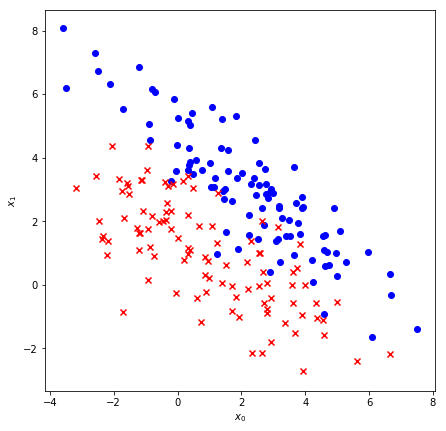

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# class 0:
# covariance matrix and mean
cov0 = np.array([[5,-4],[-4,4]])
mean0 = np.array([2.,3])
# number of data points
m0 = 100

# class 1
# covariance matrix
cov1 = np.array([[5,-3],[-3,3]])
mean1 = np.array([1.,1])
m1 = 100
# generate m0 gaussian distributed data points with
# mean0 and cov0.
r0 = np.random.multivariate_normal(mean0, cov0, m0)
r1 = np.random.multivariate_normal(mean1, cov1, m1)
t0 = np.random.multivariate_normal(mean0, cov0, m0)
t1 = np.random.multivariate_normal(mean1, cov1, m1)


def plot_data(r0, r1):
    plt.figure(figsize=(7.,7.))
    plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
    plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
    plt.xlabel("$x_0$")
    plt.ylabel("$x_1$")
    plt.show()
    
plot_data(r0,r1)    

## Initialisierung (Input, Labels)

In [2]:
# input values
x_inputs = np.concatenate((r0, r1))
print(x_inputs.shape)
# labels
y_labels = np.concatenate((np.zeros(m0), np.ones(m1)))
y_labels = np.reshape(y_labels,(200,1))
# training
t_inputs = np.concatenate((t0, t1))
print(y_labels.shape)

(200, 2)
(200, 1)


## Variables, Placeholders

In [3]:
# x (train data)
x = tf.placeholder(tf.float32, shape=x_inputs.shape)

# x (train labels)
y = tf.placeholder(tf.float32, shape=y_labels.shape)

# weights
weights = tf.Variable([[0.1],[0.1]], name="weights")

# bias
bias = tf.Variable(0.1, name="bias")

# lambda
regularisation_parameter = tf.constant(0.1, name="lambda")

## Functions

$$ Output\: h\: des\: Neurons: h = \sigma(\sum_{i=1}^{n} w_i x_i + b) = \sigma( \vec{x}^T \vec{w} + b)$$ 
$$ Logistische\: Funktion: \sigma(z) = \dfrac{1}{(1+e^{-z})}$$

In [4]:
# z function (inside of sigmoid)
z = tf.matmul(x, weights) + bias

# h function (sigmoid of h)
h = tf.sigmoid(z)

### Loss Function

$$ J(\vec{w},b) = - \dfrac{1}{m}(y log(h_{\vec{w}, b}(\vec{x}) + (1 - y) log ( 1 - h_{\vec{w}, b} (\vec{x} )) + \lambda \sum_i w_i^2 $$

In [5]:
# e function (error / loss / cost function)
e = tf.losses.sigmoid_cross_entropy(y, z)

# λ∑w^2_i
regularization = regularisation_parameter * tf.reduce_sum(tf.square(weights))

# J(w->,b)
loss = e + regularization

# gradient decent opimizer
opt = tf.train.GradientDescentOptimizer(learning_rate=0.1)
opt_op = opt.minimize(loss, var_list=[weights, bias])

## Computation

In [6]:
def print_variables(session, epoch, result_loss):
    w = session.run(weights)
    b = session.run(bias)
    print("{}.Epoche: Weights: {}, Bias: {}, Loss: {}".format(epoch, w.T, b, result_loss))

In [7]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    #result_h = session.run(h, feed_dict={x: x_inputs})
    #result_e = session.run(e, feed_dict={x: x_inputs, y: y_labels})
    #result_reg = session.run(regularization)

    losses = []
    epoch = 0
    result_loss = session.run(loss, feed_dict={x: x_inputs, y: y_labels})
    print_variables(session, epoch, result_loss)
    for i in range(1000):
        opt_op.run(feed_dict={x: x_inputs, y: y_labels})
        result_loss = session.run(loss, feed_dict={x: x_inputs, y: y_labels})
        losses.append(result_loss)
        if (i % 100 == 0):
            epoch+=1
            print_variables(session, epoch, result_loss)
    
    w = session.run(weights)
    b = session.run(bias)

0.Epoche: Weights: [[ 0.1  0.1]], Bias: 0.10000000149011612, Loss: 0.8068037629127502
1.Epoche: Weights: [[ 0.04230331  0.02350412]], Bias: 0.08900407701730728, Loss: 0.7243778705596924
2.Epoche: Weights: [[-0.32821852 -0.45565042]], Bias: 1.067300796508789, Loss: 0.4882652163505554
3.Epoche: Weights: [[-0.43030286 -0.58212912]], Bias: 1.623999834060669, Loss: 0.4537431299686432
4.Epoche: Weights: [[-0.48844352 -0.65371931]], Bias: 1.9407973289489746, Loss: 0.44262927770614624
5.Epoche: Weights: [[-0.52315563 -0.69628811]], Bias: 2.1301472187042236, Loss: 0.43867218494415283
6.Epoche: Weights: [[-0.54446298 -0.72235292]], Bias: 2.2465131282806396, Loss: 0.4371805787086487
7.Epoche: Weights: [[-0.55776107 -0.73859513]], Bias: 2.319204330444336, Loss: 0.4365991950035095
8.Epoche: Weights: [[-0.56614512 -0.74882549]], Bias: 2.365062952041626, Loss: 0.4363679587841034
9.Epoche: Weights: [[-0.57146448 -0.75531232]], Bias: 2.3941705226898193, Loss: 0.43627482652664185
10.Epoche: Weights: [[-

## Visualisierung Loss

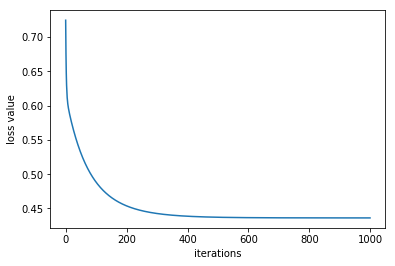

In [8]:
plt.plot(losses)
plt.ylabel('loss value')
plt.xlabel('iterations')
plt.show()

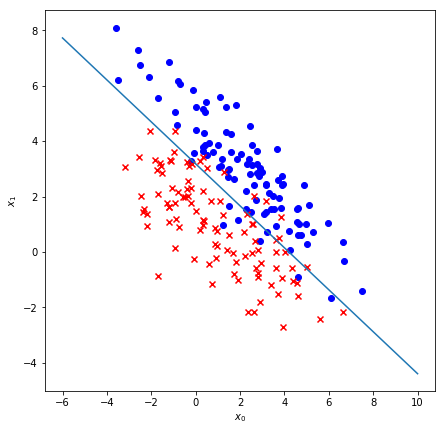

In [9]:
# initial equation inside sigmoid adjusted
# x_0 * w_0 + x_1 * w_1 + b
# after adjustment:
# x_1 = ((-x_0) * w_0 - b)/w_1
def calc_x1(x_0, w, b):
    return ((-x_0)*w[0]-b)/w[1]

plt.figure(figsize=(7.,7.))
plt.scatter(r0[...,0], r0[...,1], c='b', marker='o', label="Klasse 0")
plt.scatter(r1[...,0], r1[...,1], c='r', marker='x', label="Klasse 1")
x0 = (-6, 10) # lowest x, highest x
x1 = (calc_x1(x0[0], w, b), calc_x1(x0[1], w, b))
plt.plot(x0,x1)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.show()

In [10]:
# reinitialize variables/functions

# weights
weights = tf.Variable(w, name="weights")

# bias
bias = tf.Variable(b, name="bias")

#z function (inside of sigmoid)
z = tf.matmul(x, weights) + bias

# h function (sigmoid of h)
h = tf.sigmoid(z)

## Evaluation

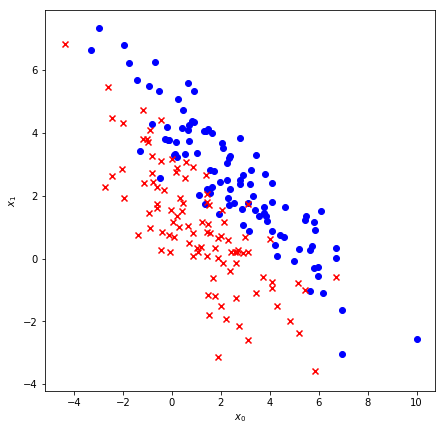

In [11]:
# plot test data
plot_data(t0,t1)

In [12]:
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    w = session.run(weights)
    b = session.run(bias)

    result = session.run(h, feed_dict={x: t_inputs})
    
    result = [int(item > 0.5) for item in result]
    result = [int(pred == label) for pred, label in zip(result, y_labels)]
    #print("Output of neurons: ", result)
    result = np.sum(result) / len(result)
    print("accuracy of prediction",result)

accuracy of prediction 0.915
